In [1]:
import os
import sys
import math
import cv2
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from keras.layers import Input, Dense, Activation, ZeroPadding2D, BatchNormalization, Flatten, Conv2D
from keras.layers import MaxPooling2D, Dropout
from keras.models import Model
from keras.preprocessing import image
from keras.utils import to_categorical
import tensorflow as tf
from sklearn.metrics import confusion_matrix
from keras.models import model_from_json

Using TensorFlow backend.


In [2]:
from google.colab import drive
drive.mount('/content/drive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3aietf%3awg%3aoauth%3a2.0%3aoob&response_type=code&scope=email%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdocs.test%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive%20https%3a%2f%2fwww.googleapis.com%2fauth%2fdrive.photos.readonly%20https%3a%2f%2fwww.googleapis.com%2fauth%2fpeopleapi.readonly

Enter your authorization code:
··········
Mounted at /content/drive


In [0]:
# root_path = '/content/drive/My Drive/naman_data/'
# count = 0
# data = []
# label = []
# for i in range(26):
#     if(i==9 or i==25):
#         # for j and z
#         continue
#     s = chr(ord('A') + i)
#     for filename in os.listdir(root_path+s):
#         if filename.endswith(".jpg"):
#             img = cv2.imread(root_path + s + "/" + filename)
#             img = img[...,::-1] # Added
#             data.append(img)
#             label.append(i)
#             count +=1
#             print(count)   
# print(count)


In [0]:
# mapIndexPosition = list(zip(data, label))
# np.random.seed(1) #using seed = 1 to get same results every time
# np.random.shuffle(mapIndexPosition)
# data, label = zip(*mapIndexPosition)
# X = np.zeros((len(data), data[0].shape[0], data[0].shape[1], data[0].shape[2]))
# Y = np.zeros(len(data))
# for i in range(len(data)):
#     X[i] = data[i]
#     Y[i] = label[i]
# split = (int)((7/8)*len(data))
# X_train = X[:split,:,:,:]
# Y_train = to_categorical(Y[:split], 25)
# X_test = X[split:,:,:,:]
# Y_test = to_categorical(Y[split:], 25)
# np.savez(root_path+"data.npz", X_train, Y_train, X_test, Y_test)

In [0]:
data = np.load('/content/drive/My Drive/naman_data/data.npz')
X_train = data['arr_0']
Y_train = data['arr_1']
X_test = data['arr_2']
Y_test = data['arr_3']

In [6]:
print("X-train shape = ", X_train.shape)
print("Y-train shape = ", Y_train.shape)
print("X-test shape = ", X_test.shape)
print("Y-test shape = ", Y_test.shape)


X-train shape =  (3893, 100, 100, 3)
Y-train shape =  (3893, 25)
X-test shape =  (557, 100, 100, 3)
Y-test shape =  (557, 25)


Alphabet -  D


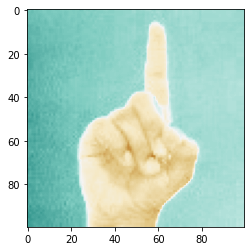

In [7]:
example = 2
plt.imshow(X_train[example,:,:,2], cmap='BrBG', vmin=0, vmax=255)
print("Alphabet - ", chr(ord('A') + np.argmax(Y_train[example])))

In [0]:
def model(input_shape):
    """
    Implementation of the HappyModel.
    
    Arguments:
    input_shape -- shape of the images of the dataset
        (height, width, channels) as a tuple.  

    """
    X_input = Input(input_shape, name="Input1")

    # Zero-Padding: pads the border of X_input with zeroes
    X = ZeroPadding2D((3, 3))(X_input)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(16, (7, 7), strides = (1, 1), name = 'conv0')(X)
    X = BatchNormalization(name = 'bn0')(X)
    X = Activation('relu')(X)
    X = Dropout(rate=0.5)(X)

    # MAXPOOL
    X = MaxPooling2D((2, 2), name='max_pool_1')(X)

    # CONV -> BN -> RELU Block applied to X
    X = Conv2D(32, (5, 5), strides = (1, 1), name = 'conv1')(X)
    X = BatchNormalization(name = 'bn1')(X)
    X = Activation('relu')(X)
    X = Dropout(rate=0.3)(X)

    #  # MAXPOOL
    # X = MaxPooling2D((2, 2), name='max_pool_2')(X)

    # # CONV -> BN -> RELU Block applied to X
    # X = Conv2D(64, (3, 3), strides = (1, 1), name = 'conv2')(X)
    # X = BatchNormalization(name = 'bn2')(X)
    # X = Activation('relu')(X)
    # X = Dropout(rate=0.2)(X)

    # FLATTEN X (means convert it to a vector) + FULLYCONNECTED
    X = Flatten()(X)
    # X = Dropout(rate=0.5)(X)
    X = Dense(25, activation='softmax', name='FC')(X)

    # Create model. This creates your Keras model instance, you'll use this instance to train/test the model.
    model = Model(inputs = X_input, outputs = X, name='Basic Model')

    return model

In [14]:
from keras.optimizers import Adam
model = model(X_train.shape[1:])
model.compile(optimizer = "adam", loss = 'categorical_crossentropy', metrics = ["accuracy"])
model.summary()

Model: "Basic Model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
Input1 (InputLayer)          (None, 100, 100, 3)       0         
_________________________________________________________________
zero_padding2d_2 (ZeroPaddin (None, 106, 106, 3)       0         
_________________________________________________________________
conv0 (Conv2D)               (None, 100, 100, 16)      2368      
_________________________________________________________________
bn0 (BatchNormalization)     (None, 100, 100, 16)      64        
_________________________________________________________________
activation_4 (Activation)    (None, 100, 100, 16)      0         
_________________________________________________________________
dropout_5 (Dropout)          (None, 100, 100, 16)      0         
_________________________________________________________________
max_pool_1 (MaxPooling2D)    (None, 50, 50, 16)        

In [15]:
model.fit(x = X_train, y = Y_train, epochs = 10, batch_size = 64)

Epoch 1/10
3893/3893 [==============================] - 5s 1ms/step - loss: 6.6340 - accuracy: 0.5723
Epoch 2/10
3893/3893 [==============================] - 5s 1ms/step - loss: 0.1274 - accuracy: 0.9628
Epoch 3/10
2432/3893 [=================>............] - ETA: 1s - loss: 0.0302 - accuracy: 0.9918

KeyboardInterrupt: ignored

In [16]:
model.evaluate(x = X_test, y= Y_test, batch_size=64)

557/557 [==============================] - 0s 690us/step


[0.28213722022046306, 0.9012567400932312]

# Save the model to drive 

In [20]:
model_json = model.to_json()
with open("model.json", "w") as json_file:
    json_file.write(model_json)
# serialize weights to HDF5
model.save_weights("model.h5")
print("Saved model to disk")

Saved model to disk


[[19  0  0  0  0  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0 17  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0 25  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0 14  0  0  0  0  0  0  0  0  0  0  0  0  1  0  0  2  0  0  0  0]
 [ 1  0  0  0 21  0  0  0  0  0  0  1  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0 18  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 1  0  0  0  0  0  3 21  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0 19  0  0  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0 20  0  0  0  0  0  0  1  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  0  0 29  0  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 2  0  0  0  0  0  0  0  0  0  0 28  0  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0  9  0  0  4 17  0  0  0  0  0  0  0  0  0  0  0]
 [ 0  0  0  0  0  0  0  0

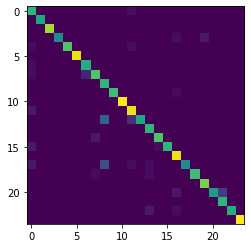

In [17]:
y_pred = np.argmax(model.predict(X_test), axis=-1)
y = np.argmax(Y_test,axis=-1)
cm = confusion_matrix(y, y_pred)
plt.imshow(cm)
np.set_printoptions(linewidth=np.inf)
print(cm)
print(model.predict(X_test))

# **Some Observations:**
- It is overfitting training data even with 1 conv layer and 1 dense layer.
- Testing accuracy = 86.5 %
- For some alphabets - it perform really well i.e. 'A', 'E', 'F'.
- For some alphabets, it is getting confused with others like 'R' with 'K' and 'I'.

Alphabet -  Q


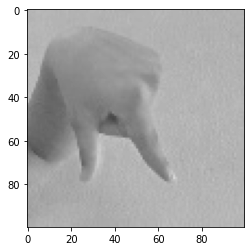

Alphabet -  U


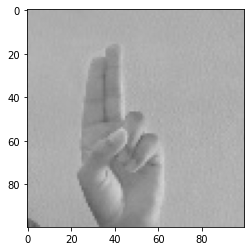

Alphabet -  P


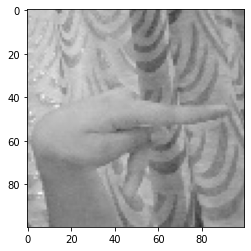

In [18]:
example = 16
plt.imshow(X_train[example,:,:,0], cmap='gray', vmin=0, vmax=255)
print("Alphabet - ", chr(ord('A') + np.argmax(Y_train[example])))
plt.show()
example = 11
plt.imshow(X_train[example,:,:,0], cmap='gray', vmin=0, vmax=255)
print("Alphabet - ", chr(ord('A') + np.argmax(Y_train[example])))
plt.show()
example = 6
plt.imshow(X_train[example,:,:,0], cmap='gray', vmin=0, vmax=255)
print("Alphabet - ", chr(ord('A') + np.argmax(Y_train[example])))
plt.show()

# **Test On Own Dataset** 

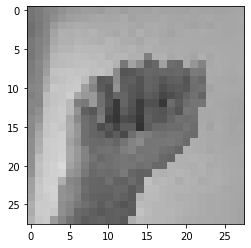

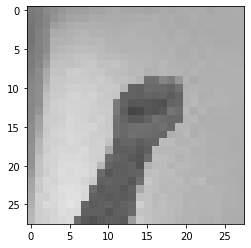

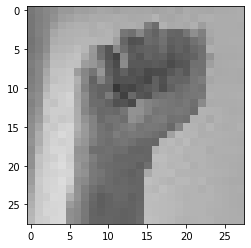

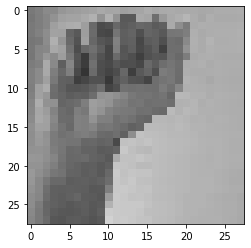

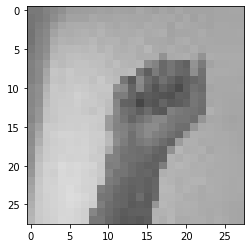

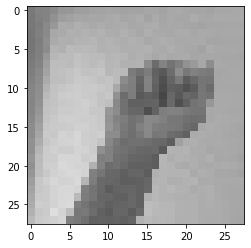

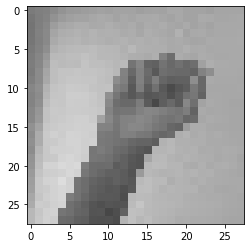

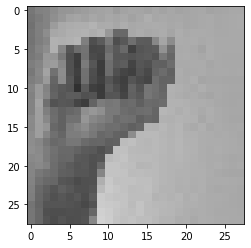

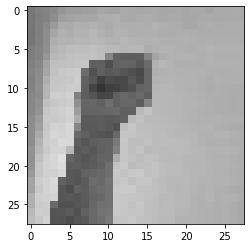

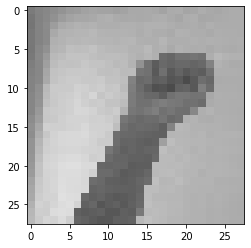

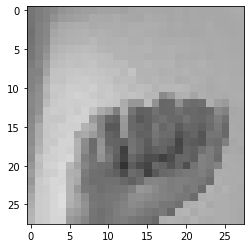

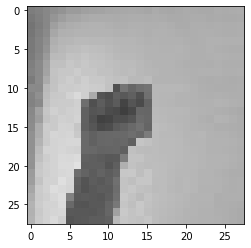

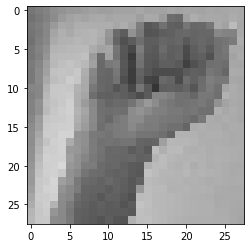

(13, 28, 28, 1)


In [0]:
from keras.preprocessing import image
data = []
s = chr(ord('A') + 0)
for filename in os.listdir(root_path+s):
    if filename.endswith(".jpg"):
        img = cv2.imread(root_path + s + "/" + filename)
        gray = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
        data.append(gray.reshape((28,28,1)))
        plt.imshow(gray, cmap='gray', vmin=0, vmax=255)
        plt.show()
test_a = np.asarray(data)
print(test_a.shape)

In [0]:
pred = model.predict(test_a)
for i in range(pred.shape[0]):
    print(chr(ord('A') + np.argmax(pred[i,:])))

T
D
O
W
T
T
Q
W
O
Q
L
K
T


In [0]:
print(Y_train)

[[1. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 ...
 [0. 0. 0. ... 1. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]
 [0. 0. 0. ... 0. 0. 0.]]
